<a href="https://colab.research.google.com/github/devdavinchi/5CS037/blob/main/devRai_worksheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

3.1 Warming Up Exercises -
Basic Inspection and Exploration Problem 1 – Data Read, Write and Inspect

In [50]:

#3.1
#Problem 1
#1
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/bank.csv")



In [51]:

#3.1
#Problem 1
#2
print("\n--- DataFrame Info ---")
print(df.info())


--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [52]:

#3.1
#Problem 1
#2)a
object_cols = df.select_dtypes(include='object').columns
print("\nColumns with object dtype:")
print(object_cols)


Columns with object dtype:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [53]:

#3.1
#Problem 1
#2)b
print("\nUnique values in object columns:")
for col in object_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Unique values in object columns:

Column: job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Column: marital
['married' 'single' 'divorced']

Column: education
['tertiary' 'secondary' 'unknown' 'primary']

Column: default
['no' 'yes']

Column: housing
['yes' 'no']

Column: loan
['no' 'yes']

Column: contact
['unknown' 'cellular' 'telephone']

Column: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Column: poutcome
['unknown' 'failure' 'other' 'success']

Column: y
['no' 'yes']


In [54]:

#3.1
#Problem 1
#2)c
print("\nNull values in each column:")
print(df.isnull().sum())


Null values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [55]:
#3.1
#Problem 1
#3
df_numeric = df.drop(columns=object_cols)
df_numeric.to_csv("banknumericdata.csv", index=False)

print("\nNew numeric DataFrame saved as 'banknumericdata.csv'")


New numeric DataFrame saved as 'banknumericdata.csv'


In [56]:

#3.1
#Problem 1
#4
df2 = pd.read_csv("banknumericdata.csv")
print("\n--- Summary Statistics ---")
print(df2.describe())


--- Summary Statistics ---
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  

In [57]:

#3.1
#Problem 2

# 1.
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/medical_students_dataset.csv")

# 2.
print("\n--- DataFrame Info ---")
print(df.info())

print("\n--- Missing Values in Each Column ---")
print(df.isnull().sum())

missing_cols = df.columns[df.isnull().any()]
print("\nColumns with missing values:", missing_cols)

# 3.
df_filled = df.copy()

for col in missing_cols:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        # Numerical columns → fill with mean
        df_filled[col] = df[col].fillna(df[col].mean())
        print(f"{col}: Filled with MEAN because it is numerical and continuous.")

    elif df[col].dtype == 'object':
        # Categorical columns → fill with mode
        df_filled[col] = df[col].fillna(df[col].mode()[0])
        print(f"{col}: Filled with MODE because it is a categorical column.")

    else:
        # fallback (if needed)
        df_filled[col] = df[col].fillna(method='ffill')
        print(f"{col}: Filled using forward fill as fallback.")


print("\n--- Missing Values After Filling ---")
print(df_filled.isnull().sum())

# 4.
print("\nDuplicate rows found:", df_filled.duplicated().sum())

df_cleaned = df_filled.drop_duplicates()
print("Duplicates removed. Final shape:", df_cleaned.shape)


--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None

--- Missing Values in Each Column ---
Student ID        20000
Age               20000
Gender            20000
Height

In [58]:

#3.2
#Problem 1
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Titanic-Dataset.csv")

# 1.
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# 2.
first_class_df = subset_df[subset_df['Pclass'] == 1]

# 3.
fare_mean = first_class_df['Fare'].mean()
fare_median = first_class_df['Fare'].median()
fare_max = first_class_df['Fare'].max()
fare_min = first_class_df['Fare'].min()

print("Mean Fare:", fare_mean)
print("Median Fare:", fare_median)
print("Maximum Fare:", fare_max)
print("Minimum Fare:", fare_min)

Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


In [59]:

#3.2
#Problem 2

df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Titanic-Dataset.csv")

subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

first_class_df = subset_df[subset_df['Pclass'] == 1]

# 1.
null_age_count = first_class_df['Age'].isnull().sum()
print("Null values in Age column:", null_age_count)

# 2.
cleaned_df = first_class_df.dropna(subset=['Age'])

print("Shape before dropping:", first_class_df.shape)
print("Shape after dropping:", cleaned_df.shape)

Null values in Age column: 30
Shape before dropping: (216, 6)
Shape after dropping: (186, 6)


In [60]:

#3.2
#Problem3

df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Titanic-Dataset.csv")

# 1.
encoded_cols = pd.get_dummies(df['Embarked'], prefix='Embarked')

# 2.
df = pd.concat([df, encoded_cols], axis=1)

# 3.
df = df.drop(columns=['Embarked'])

# 4.
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Mean survival rate by gender:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


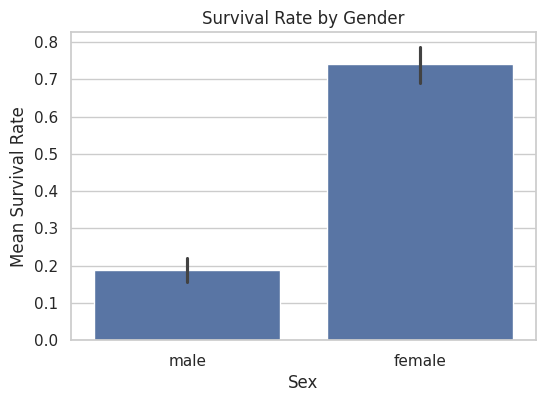

In [61]:

#3.2
#Problem4

df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Titanic-Dataset.csv")

mean_survival_by_sex = df.groupby('Sex')['Survived'].mean()
print("Mean survival rate by gender:\n", mean_survival_by_sex)

sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.ylabel('Mean Survival Rate')
plt.show()

      Sex Embarked  Survived
0  female        C  0.876712
1  female        Q  0.750000
2  female        S  0.689655
3    male        C  0.305263
4    male        Q  0.073171
5    male        S  0.174603


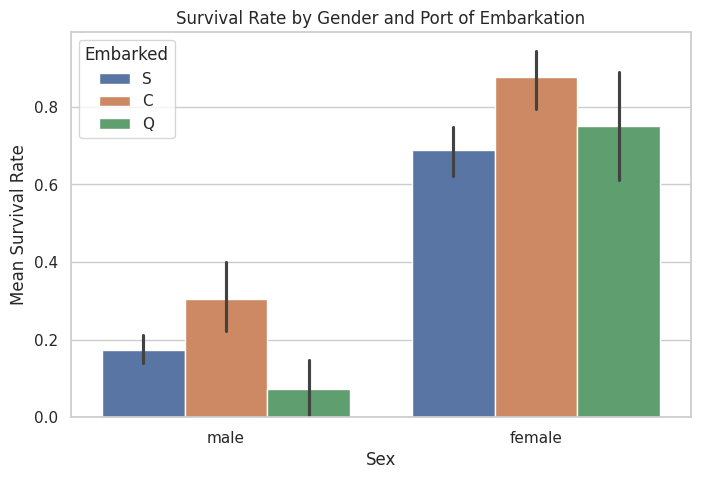

In [62]:

#3.2
#Problem5

df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Titanic-Dataset.csv")

df = df.dropna(subset=['Embarked'])

mean_survival = df.groupby(['Sex', 'Embarked'])['Survived'].mean().reset_index()
print(mean_survival)

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(x='Sex', y='Survived', hue='Embarked', data=df)
plt.title('Survival Rate by Gender and Port of Embarkation')
plt.ylabel('Mean Survival Rate')
plt.show()